In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# use ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Dataset Pengenalan Pola/Data Train'
valid_dir = '/content/drive/MyDrive/Dataset Pengenalan Pola/Data Test'

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, # rescale to normalize the data
                                   rotation_range = 40,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True)

valid_datagen = ImageDataGenerator( rescale = 1.0/255 )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))


validation_generator =  valid_datagen.flow_from_directory(valid_dir,
                                                          class_mode  = 'categorical',
                                                          target_size = (224, 224))

Found 912 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# recommended input image size = (224,224,3)
mobilenetv2_140 = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/140-224-feature-vector/versions/2"

feature_extractor_model = mobilenetv2_140

In [ ]:
# load the pre-trained model
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=True)

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 512)               918016    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 5809090 (22.16 MB)
Trainable params: 57611

In [ ]:
# create checkpoint to save best weights
checkpoint_path='model/my_checkpoint.ckpt'

checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1,
                             )

In [ ]:
# Set the training parameters

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)
#optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5)
#optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3, momentum=0.9)

model.compile(optimizer = optimizer ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 10,
            callbacks=[checkpoint],
            verbose = 2,
            )

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.54308, saving model to model/my_checkpoint.ckpt
29/29 - 411s - loss: 0.6135 - accuracy: 0.7336 - val_loss: 0.5431 - val_accuracy: 0.7955 - 411s/epoch - 14s/step
Epoch 2/10

Epoch 2: val_loss improved from 0.54308 to 0.53088, saving model to model/my_checkpoint.ckpt
29/29 - 329s - loss: 0.2180 - accuracy: 0.9803 - val_loss: 0.5309 - val_accuracy: 0.8182 - 329s/epoch - 11s/step
Epoch 3/10

Epoch 3: val_loss improved from 0.53088 to 0.32211, saving model to model/my_checkpoint.ckpt
29/29 - 320s - loss: 0.1293 - accuracy: 0.9956 - val_loss: 0.3221 - val_accuracy: 0.8977 - 320s/epoch - 11s/step
Epoch 4/10

Epoch 4: val_loss improved from 0.32211 to 0.19401, saving model to model/my_checkpoint.ckpt
29/29 - 332s - loss: 0.1127 - accuracy: 0.9934 - val_loss: 0.1940 - val_accuracy: 0.9489 - 332s/epoch - 11s/step
Epoch 5/10

Epoch 5: val_loss improved from 0.19401 to 0.12365, saving model to model/my_checkpoint.ckpt
29/29 - 321s - loss: 0.1028

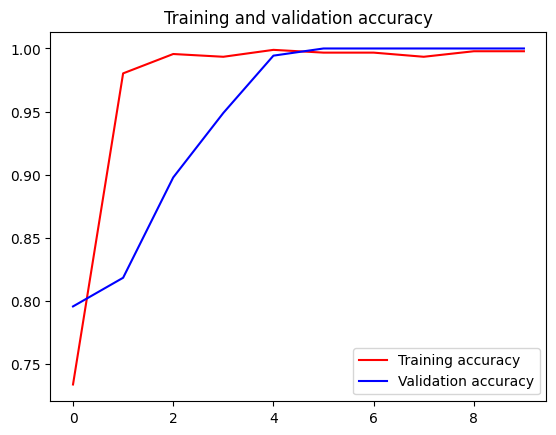

<Figure size 640x480 with 0 Axes>

In [10]:
# see training plot

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()